In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


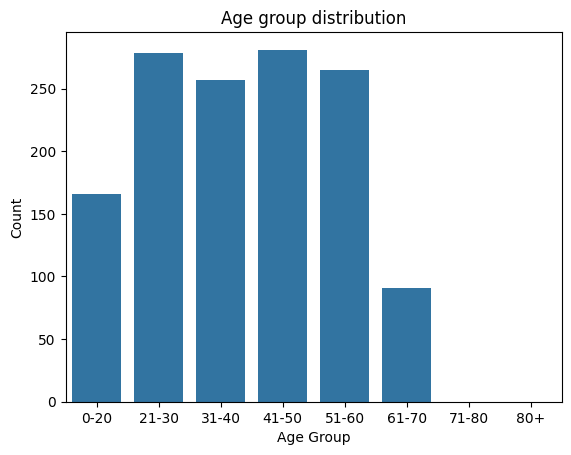

In [14]:
#step1: create bins(intervals)
bins = [0,20,30,40,50,60,70,80,100] #Define age ranges
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

#step2: create a new column with binned age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

#step3: Plot countplot using the new grouped column
#count plot
sns.countplot(data=df, x="age_group", order=labels,)
plt.title('Age group distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


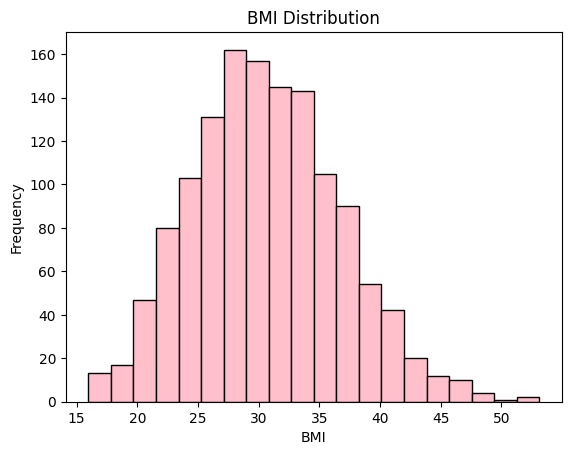

In [19]:
df['bmi'].hist(color='pink', edgecolor='black', bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

/tmp/ipython-input-23-336912509.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-23-336912509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-23-336912509.py:5: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


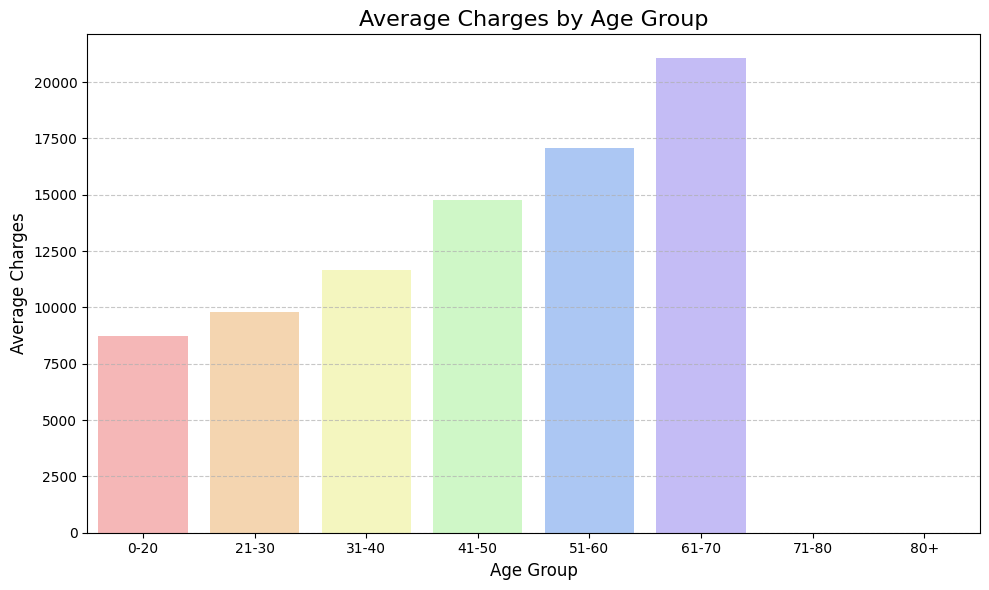

In [23]:
custom_palette = ['#FFADAD', '#FFD6A5', '#FDFFB6', '#CAFFBF', '#A0C4FF', '#BDB2FF']

# Step 3: Create barplot with styling
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='age_group',
    y='charges',
    palette=custom_palette,
    estimator='mean',
    ci=None,  # Removes confidence interval shading
    order=labels
)

# Step 4: Add plot titles and labels
plt.title('Average Charges by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Charges', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [25]:
df[df['charges'] > 20000] #charges of insurance greater than 20000

,age,sex,bmi,children,smoker,region,charges,age_group
3,33,male,22.705,0,no,northwest,21984.47061,31-40
9,60,female,25.840,0,no,northwest,28923.13692,51-60
11,62,female,26.290,0,yes,southeast,27808.72510,61-70
14,27,male,42.130,0,yes,southeast,39611.75770,21-30
19,30,male,35.300,0,yes,southwest,36837.46700,21-30
...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,0-20
1321,62,male,26.695,0,yes,northeast,28101.33305,61-70
1323,42,female,40.370,2,yes,southeast,43896.37630,41-50
1328,23,female,24.225,2,no,northeast,22395.74424,21-30


/tmp/ipython-input-32-2458761437.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


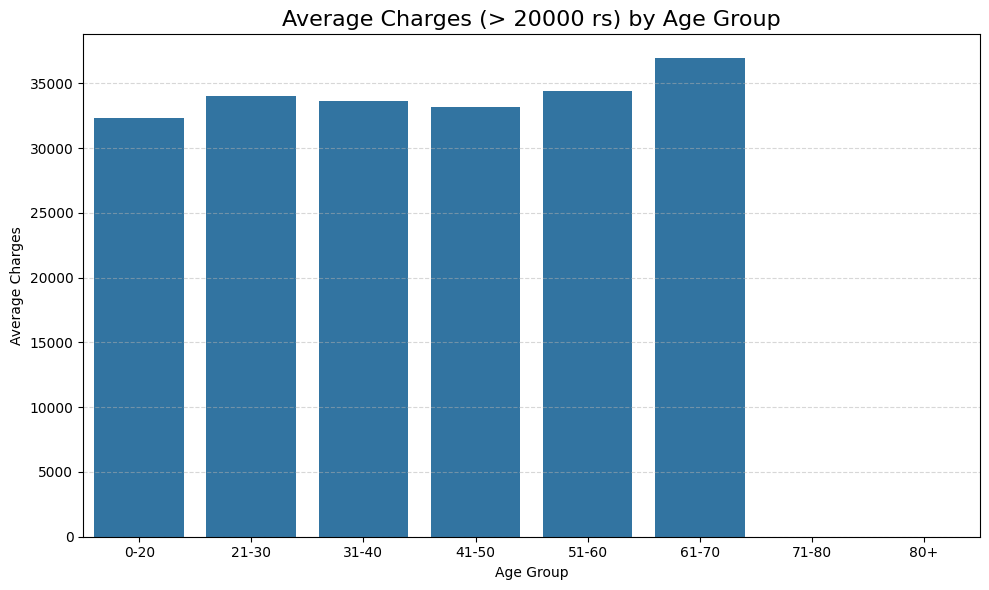

In [32]:
high_charges = df[df['charges'] > 20000]



# Step 3: Create barplot comparing age_group and charges
plt.figure(figsize=(10, 6))
sns.barplot(
    data=high_charges,
    x='age_group',
    y='charges',
    estimator='mean',
    ci=None,
    order=labels,

)

# Step 4: Add labels and grid
plt.title('Average Charges (> 20000 rs) by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()